# Setting

In [1]:
from pf_utils import BacktestManager, DataManager, StaticPortfolio, MomentumPortfolio, AssetEvaluator, metrics

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
metrics2 = [
    'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'
path_tran = 'transaction'

# Universe

In [15]:
download = True
close_today = True

# universe and file
uv_k200 = ['kospi200', 'kospi200_prices.csv']
uv_etf  = ['etf', 'etfs_all.csv']
uv_irp  = ['fund', 'funds_irp.csv']
uv_hana = ['fund', 'funds_kebhana.csv']

## KOSPI200

In [16]:
k200 = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_k200))
)
k200.upload()

200 assets from 2021-01-04 to 2024-07-19 uploaded.
df_prices updated


In [17]:
kw = dict(
    n_years=3, 
    close_today=close_today,
    #tickers=k200.df_prices.columns
)
k200.download(**kw) if download else None

200 assets from 2021-01-04 to 2024-07-22 downloaded.
data/kospi200_prices_240722.csv saved.
df_prices updated
Execution time of download: 38.25 secs


In [18]:
df_k200 = k200.df_prices
assetnames_k200 = k200.get_names()

## ETF

In [19]:
etf = DataManager(
    path = path_data,
    **dict(zip(['universe', 'file'], uv_etf)))
etf.upload()

872 assets from 2021-01-04 to 2024-07-18 uploaded.
df_prices updated


In [20]:
kw = dict(
    n_years=3, 
    close_today=close_today,
    #tickers=etf.df_prices.columns
)
etf.download(**kw) if download else None

872 assets from 2021-01-04 to 2024-07-22 downloaded.
data/etfs_all_240722.csv saved.
df_prices updated
Execution time of download: 99.24 secs


In [21]:
choice = ['069500', '273130', '148070', '379800', '411060', '284430']
df_etf = etf.df_prices[choice]
assetnames_etf = etf.get_names(tickers=choice)
assetnames_etf

0) 069500: KODEX 200
1) 273130: KODEX 종합채권(AA-이상)액티브
2) 148070: KOSEF 국고채10년
3) 379800: KODEX 미국S&P500TR
4) 411060: ACE KRX금현물
5) 284430: KODEX 200미국채혼합

## IRP - TDF
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [10]:
irp = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_irp))
)
irp.upload()
irp.get_date_range()

Estimating price from rate ...
  error: -0.07 %
  error: -0.00 %
  error: 0.16 %
  error: -0.13 %
  error: 0.00 %
5 assets from 2017-08-14 to 2024-07-15 uploaded.
df_prices updated


,start date,end date
K55301BU5479,2017-08-14,2024-06-16
K55301BU6139,2017-09-20,2024-07-14
K55301BU5453,2017-09-29,2024-06-16
K55206C96311,2018-07-13,2024-06-17
K55206C95800,2018-07-26,2024-07-15


In [11]:
df_irp = irp.df_prices
assetnames_irp = irp.get_names()
assetnames_irp

0) K55301BU6139: 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e
1) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
2) K55301BU5453: 미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e
3) K55301BU5479: 미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e
4) K55206C96311: 키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)

## HANA - FUNDS
- https://dis.kofia.or.kr

In [12]:
hana = DataManager(
    upload_type = 'rate',
    path = path_data,
    **dict(zip(['universe', 'file'], uv_hana))
)
hana.upload()
hana.get_date_range()

Estimating price from rate ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-06-28 uploaded.
df_prices updated


,start date,end date
KR5101888398,2010-01-29,2024-06-28
KR5370AP9956,2014-04-30,2024-06-28
KR5236AS4826,2014-05-30,2024-06-28
K55306CV9946,2019-10-31,2024-06-28


In [13]:
hana.check_days_in_year(12)

KR5101888398    12.0
KR5236AS4826    12.0
KR5370AP9956    12.0
K55306CV9946    12.0
dtype: float64

In [15]:
hana.convert_to_daily(True)

REMINDER: data converted to daily (days_in_year 365
Daily metrics in Performance statistics must be meaningless


In [16]:
df_hana = hana.df_prices
assetnames_hana = hana.get_names()
assetnames_hana

0) KR5101888398: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)
1) KR5236AS4826: 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E
2) KR5370AP9956: AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce
3) K55306CV9946: 다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce

<Axes: >

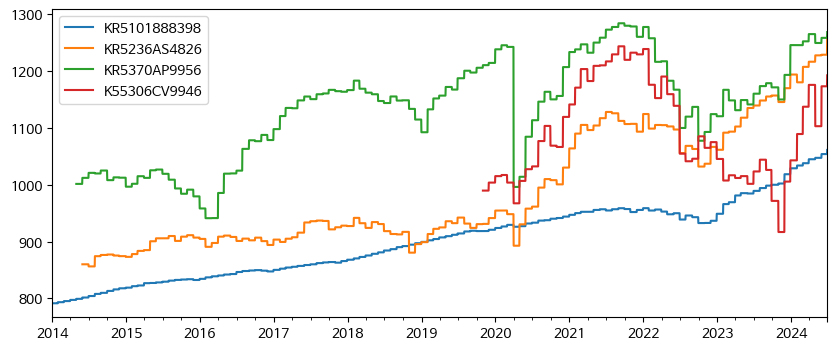

In [47]:
df_hana.loc['2014':].plot(figsize=(10,4))

# Backtest

## KOSPI 200

In [31]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246,
    asset_names = assetnames_k200
)
bm = BacktestManager(df_k200, **kwargs_bm)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year


In [32]:
lags = dict(lookback=12, lag=5)

In [33]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [34]:
select = 'Momentum'
kwargs_build = dict(
    name=f'KOSPI:{select}', select =select,
    freq='M', weigh = 'ERC',
    n_assets=5, **lags
)
bm.build(**kwargs_build)

In [16]:
select = 'K-ratio'
kwargs_build.update(dict(
    name=f'KOSPI:{select}', select =select,
))
bm.build(**kwargs_build)

Backtesting 2 strategies: KODEX200, KOSPI:Momentum


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.42it/s]

Returning stats


,KOSPI:Momentum,KODEX200
start,2021-01-03,2021-01-03
end,2024-07-15,2024-07-15
total_return,6.076125,0.073467
cagr,0.740994,0.020291
calmar,2.81907,0.072933
max_drawdown,-0.262851,-0.278222
avg_drawdown,-0.059227,-0.053124
avg_drawdown_days,17.604651,150.666667
daily_vol,0.39115,0.145841
daily_sharpe,1.642354,0.213445


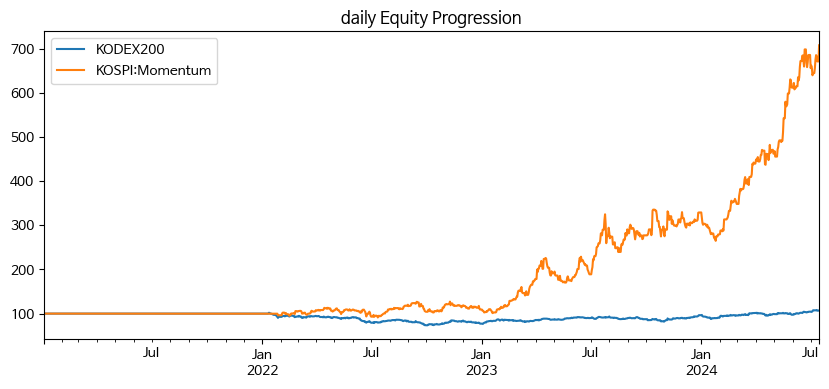

In [35]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [36]:
df_pf = bm.get_historical()
df_pf = df_pf[['KODEX200','KOSPI:Momentum']]

## ETF

In [38]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 245,
    asset_names = assetnames_etf
)
bm = BacktestManager(df_etf, **kwargs_bm)

period reset: 2021-12-15 ~ 2024-07-18
running self.util_check_days_in_year to check days in a year


In [39]:
lags = dict(lookback=12, lag=5)

In [40]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [41]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='ETF:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='ETF:ERC', weigh='ERC', **kwargs_build)
bm.build(name='ETF:InvVol', weigh='InvVol', **kwargs_build)

In [42]:
kwargs_build = dict(
    weigh='InvVol',  select = 'all',  **lags
)

bm.build(name='ETF:Eqaully(Q)', freq = 'Q', **kwargs_build)
bm.build(name='ETF:Eqaully(M)', freq = 'M', **kwargs_build)

Backtesting 6 strategies: KODEX200, ETF:Eqaully, ... , ETF:Eqaully(M)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.79it/s]


Returning stats


,ETF:Eqaully,ETF:ERC,ETF:Eqaully(M),ETF:Eqaully(Q),ETF:InvVol,KODEX200
start,2021-12-14,2021-12-14,2021-12-14,2021-12-14,2021-12-14,2021-12-14
end,2024-07-18,2024-07-18,2024-07-18,2024-07-18,2024-07-18,2024-07-18
total_return,0.270048,0.224691,0.20629,0.202248,0.198584,0.319442
cagr,0.096586,0.081312,0.075017,0.073626,0.072363,0.112842
calmar,2.627234,2.112785,2.004658,1.991795,1.918062,0.895283
max_drawdown,-0.036763,-0.038486,-0.037421,-0.036965,-0.037727,-0.126041
avg_drawdown,-0.007541,-0.007283,-0.006064,-0.00668,-0.006697,-0.02551
avg_drawdown_days,12.216216,16.740741,15.0,16.851852,16.888889,19.192308
daily_vol,0.046106,0.040436,0.038918,0.038857,0.038869,0.125859
daily_sharpe,2.071368,2.000378,1.923199,1.891992,1.860437,0.932876


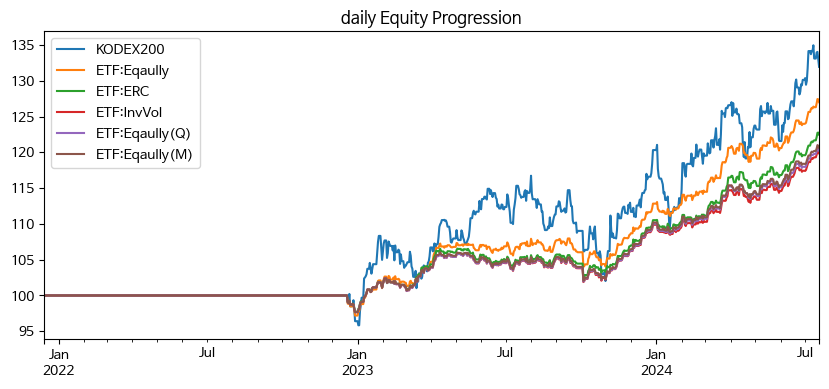

In [43]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [44]:
df = bm.get_historical()
df_pf = df_pf.join(df[['ETF:Eqaully', 'ETF:ERC']])

NameError: name 'df_pf' is not defined

## IRP

In [43]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_irp
)
bm = BacktestManager(df_irp, **kwargs_bm)

period reset: 2018-07-26 ~ 2024-06-16
running self.util_check_days_in_year to check days in a year


In [44]:
lags = dict(lookback=12, lag=5)

In [45]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [46]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='TDF:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='TDF:ERC', weigh='ERC', **kwargs_build)
bm.build(name='TDF:InvVol', weigh='InvVol', **kwargs_build)

In [47]:
choice = ['K55301BU6139', 'K55206C95800']

kwargs_build.update(dict(
    name='TDF2:Eqaully', select ='all', 
    weigh='Specified',  weights=choice
))
bm.build(**kwargs_build)

Backtesting 5 strategies: KODEX200, TDF:Eqaully, TDF:ERC, TDF:InvVol, TDF2:Eqaully


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.81it/s]

Returning stats


,TDF2:Eqaully,TDF:Eqaully,TDF:InvVol,TDF:ERC,KODEX200
start,2018-07-25,2018-07-25,2018-07-25,2018-07-25,2018-07-25
end,2024-06-14,2024-06-14,2024-06-14,2024-06-14,2024-06-14
total_return,0.386717,0.369804,0.334643,0.338897,0.548027
cagr,0.057086,0.054885,0.050238,0.050805,0.077024
calmar,0.264737,0.264097,0.262103,0.262441,0.222392
max_drawdown,-0.215632,-0.207823,-0.191671,-0.193587,-0.346343
avg_drawdown,-0.01504,-0.014127,-0.012421,-0.012834,-0.041874
avg_drawdown_days,32.085106,31.333333,29.86,30.653061,53.935484
daily_vol,0.066812,0.064454,0.058252,0.058886,0.183777
daily_sharpe,0.884602,0.881452,0.891091,0.891528,0.505265


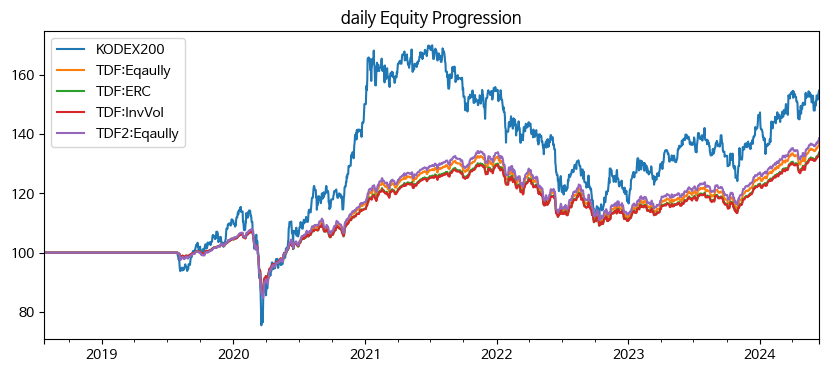

In [48]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [49]:
df = bm.get_historical()
df_pf = df_pf.join(df['TDF2:Eqaully'])

## HANA

In [18]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 0, 
    days_in_year = 365,
    asset_names = assetnames_hana
)
bm = BacktestManager(df_hana, **kwargs_bm)

period reset: 2019-10-31 ~ 2024-06-28
running self.util_check_days_in_year to check days in a year


In [19]:
lags = dict(lookback=12, lag=5)

In [20]:
bm.benchmark_ticker(**lags)

Benchmark is KODEX200


In [21]:
kwargs_build = dict(
    freq = 'Y', select = 'all',
    **lags # added to start backtest on same date with momentum
)

bm.build(name='HANA:Eqaully', weigh='equally', **kwargs_build)
bm.build(name='HANA:ERC', weigh='ERC', **kwargs_build)
bm.build(name='HANA:InvVol', weigh='InvVol', **kwargs_build)

In [22]:
kwargs_build = dict(
    weigh='InvVol',  select = 'all',  **lags
)

bm.build(name='HANA:InvVol(Q)', freq = 'Q', **kwargs_build)
bm.build(name='HANA:InvVol(M)', freq = 'M', **kwargs_build)

Backtesting 6 strategies: KODEX200, HANA:Eqaully, ... , HANA:InvVol(M)


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.23it/s]

Returning stats


,HANA:InvVol,HANA:ERC,HANA:InvVol(M),HANA:InvVol(Q),HANA:Eqaully,KODEX200
start,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30,2019-10-30
end,2024-06-28,2024-06-28,2024-06-28,2024-06-28,2024-06-28,2024-06-28
total_return,0.153569,0.185844,0.124549,0.127889,0.161083,0.326834
cagr,0.031114,0.037235,0.025495,0.026147,0.032551,0.06253
calmar,0.542901,0.456031,0.392246,0.403563,0.334554,0.182286
max_drawdown,-0.057311,-0.081649,-0.064998,-0.064791,-0.097296,-0.34303
avg_drawdown,-0.018008,-0.029835,-0.011153,-0.013248,-0.034344,-0.039949
avg_drawdown_days,153.8,215.0,126.0,146.166667,222.25,84.933333
daily_vol,0.032323,0.046502,0.032298,0.032979,0.049763,0.153863
daily_sharpe,0.984613,0.826376,0.812518,0.816102,0.682506,0.479576


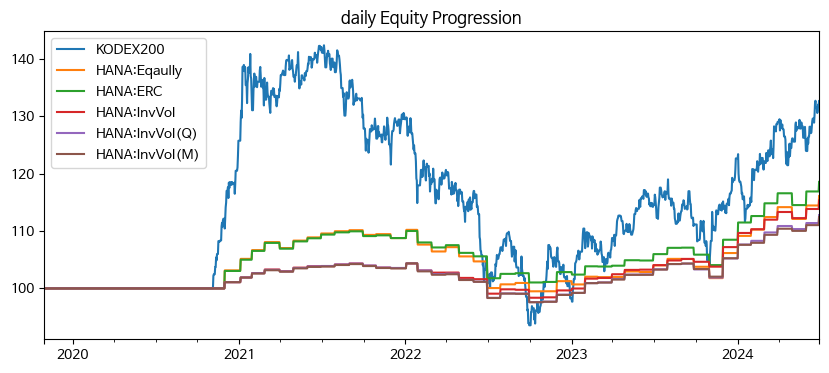

In [23]:
bm.run(figsize=(10,4), stats_sort_by='monthly_sharpe')

In [24]:
df = bm.get_historical()
df_pf = df_pf.join(df['HANA:InvVol'])

NameError: name 'df_pf' is not defined

## Summary

In [58]:
ae = AssetEvaluator(df_pf, 245)

ETF:Eqaully: 244
ETF:ERC: 244
TDF2:Eqaully: 246
HANA:InvVol: 246


In [59]:
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

,ETF:Eqaully,ETF:ERC,KOSPI:Momentum,HANA:InvVol,TDF2:Eqaully,KODEX200
start,2022-12-19,2022-12-19,2022-01-25,2022-01-10,2022-01-10,2022-01-10
end,2024-07-15,2024-07-15,2024-07-15,2024-06-28,2024-06-14,2024-07-15
total_return,0.268406,0.221212,6.076125,0.105528,0.048404,0.073467
cagr,0.163337,0.135605,1.208567,0.041555,0.019678,0.02864
calmar,4.442957,3.523505,4.597925,0.725071,0.120567,0.10294
max_drawdown,-0.036763,-0.038486,-0.262851,-0.057311,-0.16321,-0.278222
avg_drawdown,-0.007653,-0.007471,-0.059227,-0.026509,-0.02669,-0.053124
avg_drawdown_days,12.527778,17.384615,17.604651,214.666667,106.375,150.666667
daily_vol,0.058874,0.051632,0.467956,0.042535,0.068992,0.173314
daily_sharpe,2.673554,2.559844,1.973106,1.001981,0.324167,0.253552


# Transaction

## KOSPI200

In [22]:
kwargs = dict(
    name='KOSPI Momentum',
    file='pf_k200_momentum.csv',
    method_select='Simple', method_weigh='ERC', lookback=12, lag=5,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
)

pf_k200 = MomentumPortfolio(df_k200, **kwargs)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-22 loaded.


Value 14,255,000, Profit 0.0%


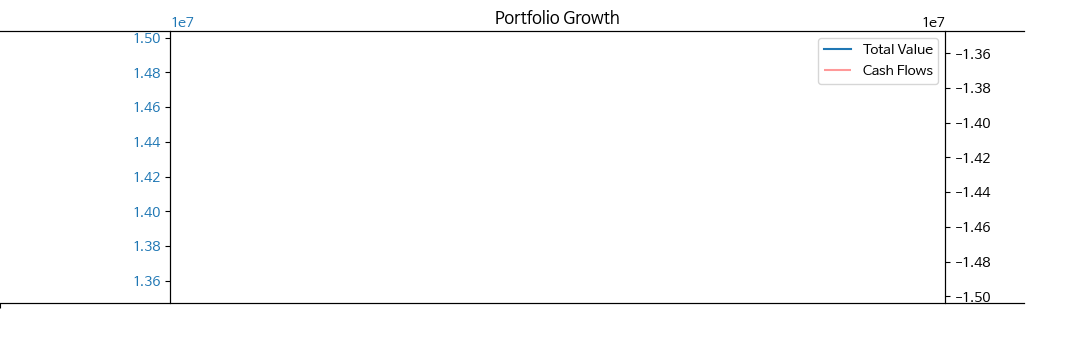

In [23]:
pf_k200.calc_value()

In [24]:
pf_k200.get_historical()

2024-07-22    14255000
Name: KOSPI Momentum, dtype: int64

In [14]:
kwargs = dict(
    #date = '2024-06-15',
    date = None,
    n_assets = 5,
    capital = 0,
    #capital = 15000000,
    save = False
    #save = True
)
pf_k200.transaction_pipeline(**kwargs)

5 assets selected by Total return from 2023-07-14 to 2024-07-12
ERROR: check the date as no new transaction
The profit from the most recent transaction: 0


name   price  transaction  net  weight  weight*
date       asset                                                         
2024-07-22 003230         삼양식품  637000            5    5   0.227    0.222
           267260     HD현대일렉트릭  314000            9    9   0.198    0.193
           042700        한미반도체  149000           20   20   0.205    0.211
           000150           두산  200000           13   13   0.189    0.187
           010120  LS ELECTRIC  222000           12   12   0.181    0.187

In [15]:
pf_k200.plot()

ERROR: no historical


In [16]:
pf_k200.performance(metrics=metrics)

ERROR: no historical


In [17]:
#pf_k200.performance(metrics=metrics2)
df_pf = pf_k200.get_historical()

ERROR: no historical


## ETF

In [25]:
kwargs = dict(
    name='ETF6',
    file='pf_etf_static.csv',
    method_weigh='Equally', lookback=12, lag=5,
    path=path_tran,
    days_in_year=245,
    asset_names=assetnames_etf,
)

pf_etf = StaticPortfolio(df_etf, **kwargs)

period reset: 2021-12-15 ~ 2024-07-22
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-07-18 loaded.


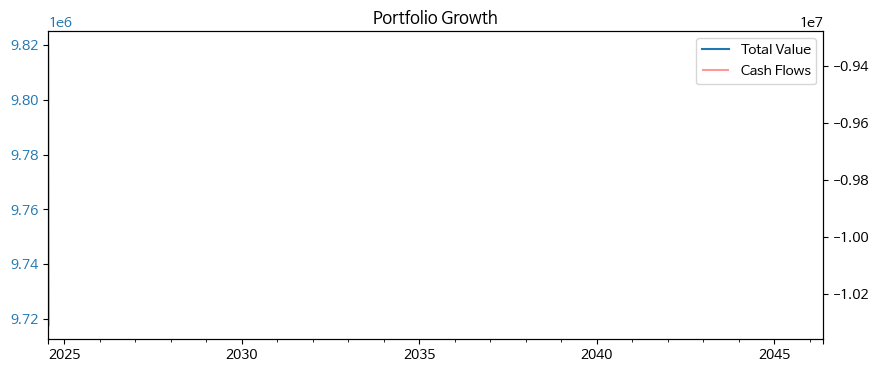

In [26]:
pf_etf.plot()

In [27]:
pf_etf.performance(metrics=metrics)

,ETF6
start,2024-07-18
end,2024-07-22
total_return,-0.01041
cagr,-0.615414
calmar,-59.114989
max_drawdown,-0.01041
avg_drawdown,-0.01041
avg_drawdown_days,3.0
daily_vol,0.019787
daily_sharpe,-66.460493


In [25]:
kwargs = dict(
    date = None,
    #date = '2024-07-18',
    capital = 0,
    save = False
    #save = True
)
pf_etf.transaction_pipeline(**kwargs)

6 assets from 2023-07-13 to 2024-07-12 prepared for weight analysis
ERROR: check the date as no new transaction
The profit from the most recent transaction: 0


name   price  transaction  net  weight  \
date       asset                                                            
2024-07-18 069500             KODEX 200   39085           42   42   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14   0.167   
           148070          KOSEF 국고채10년  114910           14   14   0.167   
           379800      KODEX 미국S&P500TR   17625           94   94   0.167   
           411060            ACE KRX금현물   15715          106  106   0.167   
           284430        KODEX 200미국채혼합   13440          124  124   0.167   

                   weight*  
date       asset            
2024-07-18 069500    0.167  
           273130    0.161  
           148070    0.164  
           379800    0.169  
           411060    0.170  
           284430    0.170

In [42]:
df_pf = df_pf.to_frame().join(pf_etf.get_historical(), how='outer')

## IRP

In [12]:
choice = ['K55301BU6139', 'K55206C95800']

In [13]:
kwargs = dict(
    name='TDF2',
    file='pf_tdf_static.csv',
    lookback=12, lag=5,
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_irp,
)

pf_irp = StaticPortfolio(df_irp[choice], **kwargs)
pf_irp.record

period reset: 2018-07-26 ~ 2024-07-14
running self.util_check_days_in_year to check days in a year
Transaction record to 2024-06-19 loaded.


name  price  \
date       asset                                                            
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   

                         transaction   net  weight  weight*  
date       asset                                             
2024-06-19 K55301BU6139         3132  3132     0.5      0.5  
           K55206C95800         3657  3657     0.5      0.5

Value 10,149,879, Profit 1.6%


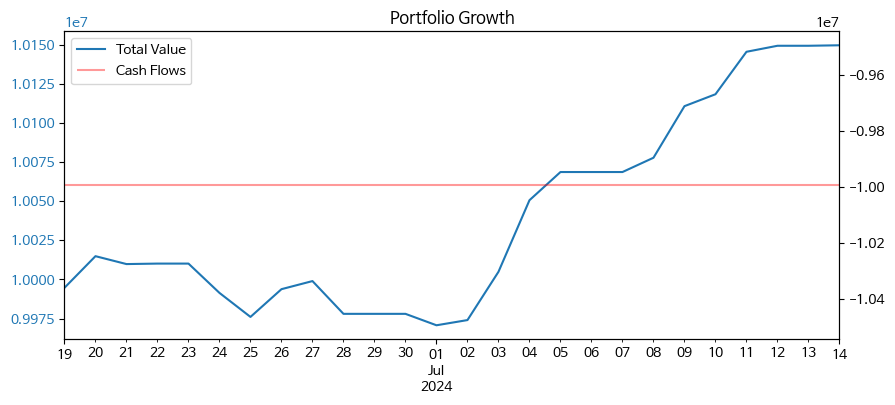

In [14]:
pf_irp.calc_value()

In [35]:
kwargs = dict(
    method_weigh = 'Equally', 
    #date = '2024-06-19',
    capital=0,
    save = False
)
df = pf_irp.transaction_pipeline(**kwargs)

2 assets from 2023-07-09 to 2024-07-09 prepared for weight analysis
Weights of assets determined by Equal weights.
Mean absolute error of weights: 0 %
Value 10,150,281, Profit 1.6%
Set save=True to save transaction record


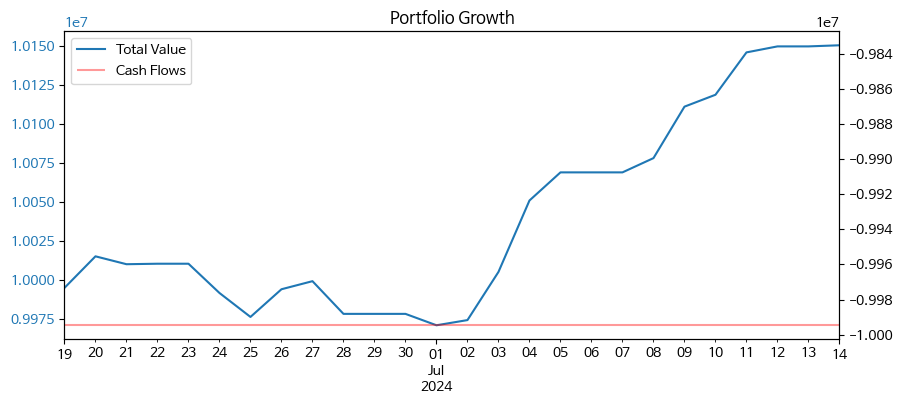

In [36]:
pf_irp.plot()

In [37]:
pf_irp.performance(metrics=metrics)

,TDF2
start,2024-06-19
end,2024-07-14
total_return,0.015571
cagr,0.25324
calmar,57.339732
max_drawdown,-0.004416
avg_drawdown,-0.004416
avg_drawdown_days,13.0
daily_vol,0.025598
daily_sharpe,6.098235


In [48]:
df_pf = df_pf.join(pf_tdf.get_historical(), how='outer')
df_pf.tail()

,KOSPI Momentum,ETF6,TDF2
2024-07-11,21730600.0,NaN,1.014572e+07
2024-07-12,21270700.0,NaN,1.014957e+07
2024-07-13,NaN,NaN,1.014957e+07
2024-07-14,NaN,NaN,1.014988e+07
2024-07-15,26299650.0,NaN,NaN


## HANA

In [34]:
kwargs = dict(
    name='HANA4',
    file='pf_hana_static.csv',
    method_weigh='InvVol', lookback=12, lag=5,
    path=path_tran,
    days_in_year=365,
    asset_names=assetnames_hana,
)

pf_hana = StaticPortfolio(df_hana, **kwargs)

period reset: 2019-10-31 ~ 2024-06-28
running self.util_check_days_in_year to check days in a year
REMINDER: make sure this is 1st transaction as no records provided


In [35]:
pf_hana.plot()

ERROR: No transaction record


In [36]:
pf_hana.performance(metrics=metrics)

ERROR: No transaction record


In [37]:
kwargs = dict(
    date = None,
    #date = '2024-07-18',
    capital = 10000000,
    save = False
    #save = True
)
pf_hana.transaction_pipeline(**kwargs)

4 assets from 2023-06-23 to 2024-06-23 prepared for weight analysis
Weights of assets determined by Inv.Vol.
Mean absolute error of weights: 0 %
Value 9,995,364, Profit 0
Set save=True to save transaction record


name  price  \
date       asset                                                        
2024-06-28 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1061   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1260   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1268   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1192   

                         transaction   net weight weight*  
date       asset                                           
2024-06-28 KR5101888398         4628  4628  0.491   0.491  
           KR5236AS4826         2130  2130  0.269   0.268  
           KR5370AP9956         1372  1372  0.174   0.174  
           K55306CV9946          555   555  0.066   0.066

In [42]:
df_pf = df_pf.to_frame().join(pf_hana.get_historical(), how='outer')

## Summary

In [33]:
ae = AssetEvaluator(df_pf, 242)
ae.get_stats(sort_by='monthly_sharpe', align_period=False)

KODEX200: 245
KOSPI:Momentum: 245
ETF:Eqaully: 244
ETF:ERC: 244
TDF2:Eqaully: 246


,ETF:Eqaully,ETF:ERC,KOSPI:Momentum,TDF2:Eqaully,KODEX200
start,2022-12-19,2022-12-19,2022-01-25,2022-01-10,2022-01-10
end,2024-07-15,2024-07-15,2024-07-15,2024-06-14,2024-07-15
total_return,0.268406,0.221212,6.076125,0.048404,0.073467
cagr,0.163337,0.135605,1.208567,0.019678,0.02864
calmar,4.442957,3.523505,4.597925,0.120567,0.10294
max_drawdown,-0.036763,-0.038486,-0.262851,-0.16321,-0.278222
avg_drawdown,-0.007653,-0.007471,-0.059227,-0.02669,-0.053124
avg_drawdown_days,12.527778,17.384615,17.604651,106.375,150.666667
daily_vol,0.058874,0.051632,0.467956,0.068992,0.173314
daily_sharpe,2.673554,2.559844,1.973106,0.324167,0.253552


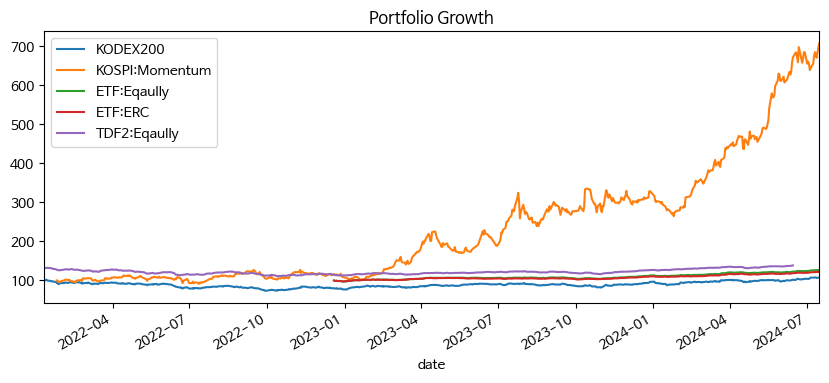

In [34]:
_ = ae.plot_historical()

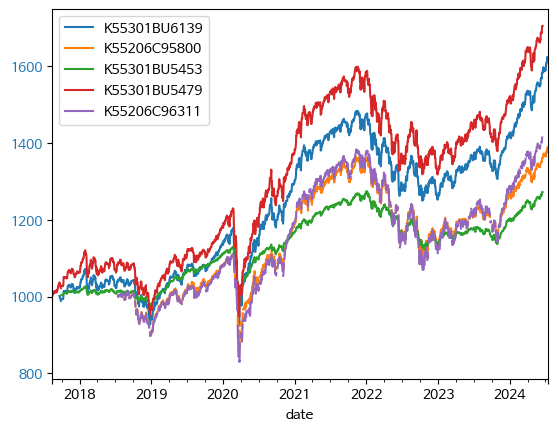

In [48]:
ax = df_irp.plot()
ax.tick_params(axis='y', labelcolor=ax.get_lines()[0].get_color())

# testing

In [7]:
kwargs = dict(
    name='KOSPI Momentum',
    file='test.csv',
    method_select='Simple', method_weigh='ERC', lookback=12, lag=5,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
)

In [8]:
pf_k200 = MomentumPortfolio(df_k200, **kwargs)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
Transaction record to 2023-12-28 loaded.


Value 17,622,550, Profit 19.9%


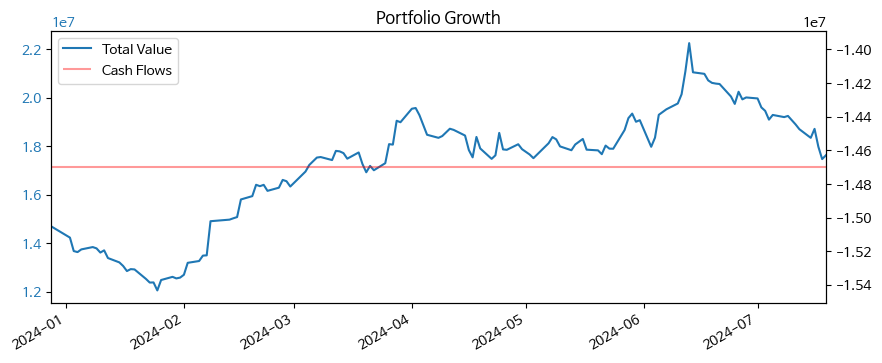

In [9]:
pf_k200.calc_value()

In [10]:
kwargs = dict(
    #date = '2024-03-01',
    date = None,
    n_assets = 5,
    capital = 0,
    #capital = 15000000,
    save = False
    #save = True
)

In [11]:
df = pf_k200.transaction_pipeline(**kwargs)
df

5 assets selected by Total return from 2023-07-14 to 2024-07-12
Weights of assets determined by ERC.
Mean absolute error of weights: 5 %
Value 17,622,550, Profit 19.9%
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                       
2023-12-28 022100        포스코DX   74200           33   33  0.165   0.167
           002710        TCC스틸   58800           46   46  0.184   0.184
           042700        한미반도체   61700           65   65  0.271   0.273
           001570           금양  109200           21   21  0.159   0.156
           005070       코스모신소재  147300           22   22  0.221    0.22
2024-07-19 003230         삼양식품  636000            5    5  0.227   0.228
           267260     HD현대일렉트릭  307000            9    9  0.198   0.198
           042700        한미반도체  151000          -46   19  0.205   0.206
           000150           두산  206000           13   13  0.189   0.192
           010120  LS ELECTRIC  223000           11   11  0.181   0.176
           001570          NaN   75600          -21    0      0       0
           002710          NaN   43450          -46    0      0       0
           005070          NaN  139900          -22    0      0       0
           022100          NaN   34650          -33    0      0       0

In [28]:
17622550 - 2924850

14697700

In [27]:
pf_k200.get_historical()

2023-12-28    14697700
2024-01-02    14227900
2024-01-03    13673800
2024-01-04    13630700
2024-01-05    13742100
                ...   
2024-07-15    18340800
2024-07-16    18710700
2024-07-17    17975100
2024-07-18    17465050
2024-07-19    17622550
Name: KOSPI Momentum, Length: 137, dtype: int64

In [29]:
# 자산 가치
pf_k200.df_rec.apply(lambda x: x['price'] * x['net'], axis=1).groupby('date').sum()

date
2023-12-28    14697700
2024-07-19    13943000
dtype: int64

In [30]:
pf_k200.df_rec.apply(lambda x: x['price'] * x['transaction'], axis=1).groupby('date').sum()

date
2023-12-28    14697700
2024-07-19    -3679550
dtype: int64

In [35]:
# 
pf_k200._calc_cashflow(pf_k200.df_rec)

date
2023-12-28   -14697700
2024-07-19   -11018150
dtype: int64

In [33]:
13943000+3679550

17622550

In [34]:
11018150+3679550

14697700

In [51]:
2938950 + 13943000

16881950

In [32]:
pf_k200._calc_record_value(pf_k200.df_rec)

16881950

In [33]:
pf_k200.get_historical()

2023-12-28    14697700
2024-01-02    14153200
2024-01-03    13484700
2024-01-04    13589700
2024-01-05    13871800
                ...   
2024-07-15    13913500
2024-07-16    13692300
2024-07-17    13268600
2024-07-18    12931750
2024-07-19    16881950
Name: KOSPI Momentum, Length: 137, dtype: int64

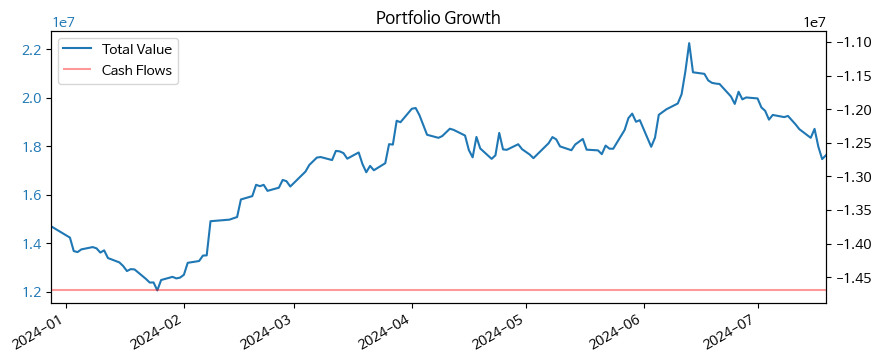

In [36]:
pf_k200.plot()

In [20]:
df1 = pf_k200.get_historical()

In [7]:
kwargs = dict(
    name='KOSPI Momentum',
    file='test2.csv',
    method_select='Simple', method_weigh='ERC', lookback=12, lag=5,
    path=path_tran,
    days_in_year=246,
    asset_names=assetnames_k200,
)

In [8]:
test = MomentumPortfolio(df_k200, **kwargs)

15 assets removed for shorter periods (7.5%)
running self.util_check_days_in_year to check days in a year
Transaction record to 2023-12-28 loaded.


In [9]:
kwargs = dict(
    date = '2024-03-01',
    #date = None,
    n_assets = 5,
    capital = 0,
    #capital = 15000000,
    save = False
    #save = True
)

In [10]:
test.transaction_pipeline(**kwargs)

5 assets selected by Total return from 2023-02-24 to 2024-02-23
Weights of assets determined by ERC.
Mean absolute error of weights: 2 %
Value 17,179,600, Profit 2,760,700
Set save=True to save transaction record


name   price  transaction  net weight weight*
date       asset                                                    
2023-12-28 002710     포스코DX   73000           33   33  0.165   0.167
           042700     TCC스틸   60000           46   46  0.184   0.184
           001570     한미반도체   60000           65   65  0.271   0.273
           022100        금양  110000           21   21  0.159   0.156
           005070    코스모신소재  150000           22   22  0.221    0.22
2024-02-29 022100     포스코DX   54100           19   40  0.150   0.150
           002710     TCC스틸   67700           -1   32  0.151   0.150
           042700     한미반도체   84800           -9   37  0.216   0.218
           267260  HD현대일렉트릭  124400           36   36  0.313   0.311
           006110     삼아알미늄   98900           25   25  0.170   0.171
           001570       NaN   96500          -65    0      0       0
           005070       NaN  177100          -22    0      0       0

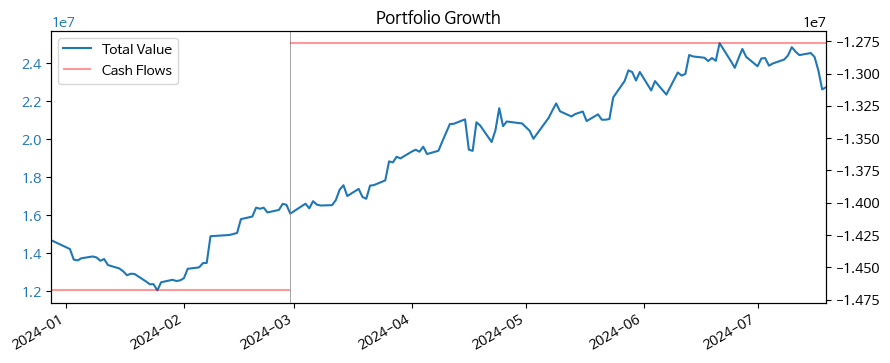

In [11]:
test.plot()

In [12]:
df2 = test.get_historical()

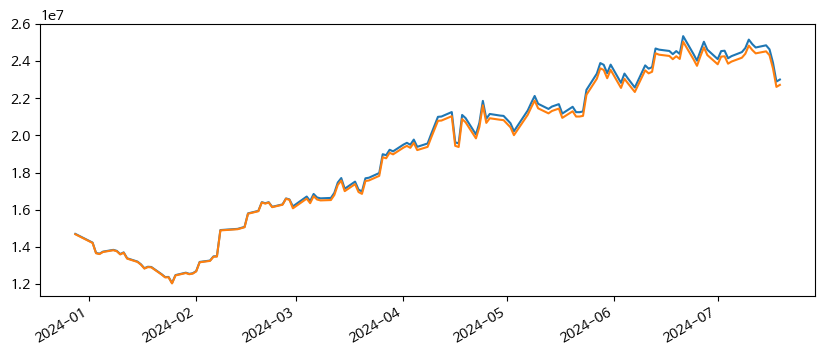

In [21]:
ax = df1.plot(figsize=(10,4))
_ = df2.plot(ax=ax)

In [39]:
df = test.df_rec.copy()
df.index.get_level_values(1) = 0
df

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (4100866778.py, line 2)

In [26]:
df2.head()

2023-12-28    14679000
2024-01-02    14209200
2024-01-03    13655100
2024-01-04    13612000
2024-01-05    13723400
Name: KOSPI Momentum, dtype: int64

In [37]:
a = ['1', '234', '3456', 13456 ]
[str(x).zfill(6) for x in a]

['000001', '000234', '003456', '013456']

In [33]:
s = '1234'
s.zfill(6)

'001234'